In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import gzip
import struct
import sklearn
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# 1

## a

In [2]:
np.random.seed(1)
num_points = 100
cat1_mean = [1,1]
cat2_mean = [5,5]
cat1_sd = 1
cat2_sd = 1
cat1 = np.random.normal(loc=cat1_mean, scale=cat1_sd, size=(num_points,2))
cat2 = np.random.normal(loc=cat2_mean, scale=cat2_sd, size=(num_points,2))
data = np.vstack((cat1,cat2))

## b

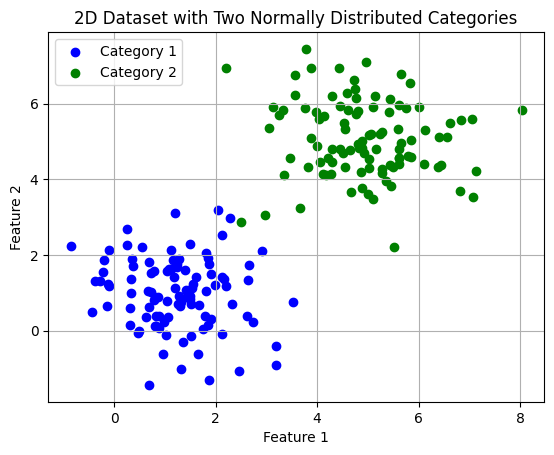

In [3]:
plt.scatter(cat1[:, 0], cat1[:, 1], color="blue", label="Category 1")
plt.scatter(cat2[:, 0], cat2[:, 1], color="green", label="Category 2")
plt.title("2D Dataset with Two Normally Distributed Categories")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.legend(loc="upper left")
plt.show()

# 2

## a

In [4]:
def euclidian_distance(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

# b

In [5]:
def initialize_centroids(input_data, k):
    idx = np.random.choice(input_data.shape[0], k, replace=False)
    centroids = input_data[idx]
    return centroids

In [6]:
k = 2
centroids = initialize_centroids(data, k)

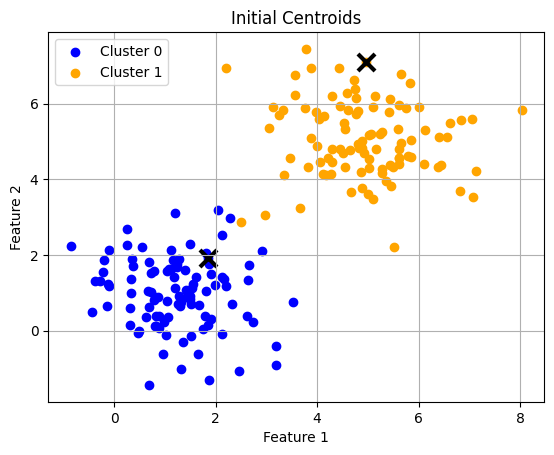

In [7]:
plt.scatter(cat1[:, 0], cat1[:, 1], color="blue", label="Cluster 0")
plt.scatter(cat2[:, 0], cat2[:, 1], color="orange", label="Cluster 1")
plt.scatter(centroids[:, 0], centroids[:, 1], color="black", marker="x", s=150, linewidths=3)
plt.title("Initial Centroids")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.legend(loc="upper left")
plt.show()

# 3

## a

In [8]:
def assign_cluster(input_data, centroids):
    clusters = []
    for point in input_data:
        distances = []
        for centroid in centroids:
            distances.append(euclidian_distance(point[0], point[1], centroid[0], centroid[1]))
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters

## b

In [9]:
def update_centroids(input_data, cluster, k):
    centroids = np.zeros((k, input_data.shape[1]))
    for esh in range(k):
        points = input_data[np.array(cluster) == esh]
        centroids[esh] = points.mean(axis=0)
    return centroids

## c

In [10]:
def K_means(input_data, k):
    centroids = initialize_centroids(input_data, k)
    epoch = 0
    while epoch < 1000:
        cluster = assign_cluster(input_data, centroids)
        updated_centroids = update_centroids(input_data, cluster, k)
        if(np.all(centroids == updated_centroids)):
           return cluster, centroids
        centroids = updated_centroids
        epoch += 1
    return cluster, centroids

## d

In [11]:
cluster, centroid = K_means(data, k)
cluster_0 = np.array([data[i] for i in range(data.shape[0]) if cluster[i] == 0])
cluster_1 = np.array([data[i] for i in range(data.shape[0]) if cluster[i] == 1])

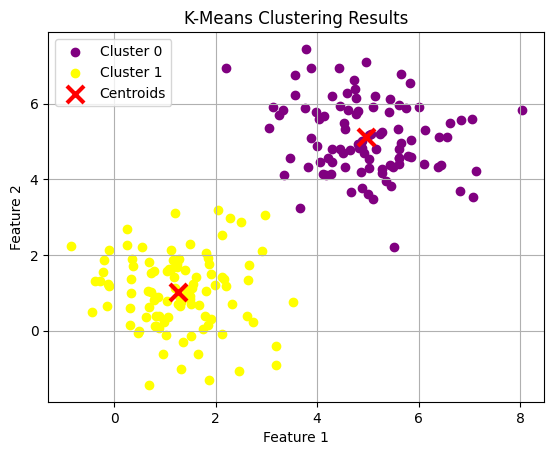

In [12]:
plt.scatter(cluster_0[:, 0], cluster_0[:, 1], color="purple", label="Cluster 0")
plt.scatter(cluster_1[:, 0], cluster_1[:, 1], color="yellow", label="Cluster 1")
plt.scatter(centroid[:, 0], centroid[:, 1], color="red", marker="x", s=150, linewidths=3, label="Centroids")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.legend(loc="upper left")
plt.show()

# 4

# a

In [13]:
!unzip "/content/MNIST.zip"
def read_idx(filename):
    with gzip.open(filename, "rb") as f:
        zero, data_type, dims = struct.unpack(">HBB", f.read(4))
        shape = tuple(struct.unpack(">I", f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
test_images = read_idx("/content/t10k-images-idx3-ubyte.gz")
test_labels = read_idx("/content/t10k-labels-idx1-ubyte.gz")
train_images = read_idx("/content/train-images-idx3-ubyte.gz")
train_labels = read_idx("/content/train-labels-idx1-ubyte.gz")
print("Test images shape: ", test_images.shape)
print("Test labels shape: ", test_labels.shape)
print("Train images shape: ", train_images.shape)
print("Train labels shape: ", train_labels.shape)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1] * test_images.shape[2])
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1] * train_images.shape[2])
print("Test images shape: ", test_images.shape)
print("Train images shape: ", train_images.shape)

Archive:  /content/MNIST.zip
  inflating: train-labels-idx1-ubyte.gz  
  inflating: t10k-images-idx3-ubyte.gz  
  inflating: t10k-labels-idx1-ubyte.gz  
  inflating: train-images-idx3-ubyte.gz  
Test images shape:  (10000, 28, 28)
Test labels shape:  (10000,)
Train images shape:  (60000, 28, 28)
Train labels shape:  (60000,)
Test images shape:  (10000, 784)
Train images shape:  (60000, 784)


In [14]:
start = time.time()
cluster_mnist, centroid_mnist = K_means(train_images, 10)
end = time.time()
train_time = end-start
print(f"Training Time(h): {train_time/(60*60)}")
print(f"Training Time(m): {train_time/60}")
print(f"Training Time(s): {train_time}")

Training Time(h): 0.7362311860587862
Training Time(m): 44.173871163527174
Training Time(s): 2650.4322698116302


# 5

## a

In [15]:
K = [10,16,64,256]
model_inertia = []
for num_clusters in K:
  mini_batch_k_means = MiniBatchKMeans(n_clusters=num_clusters)
  mini_batch_k_means.fit(train_images)
  model_inertia.append(mini_batch_k_means.inertia_)

## b

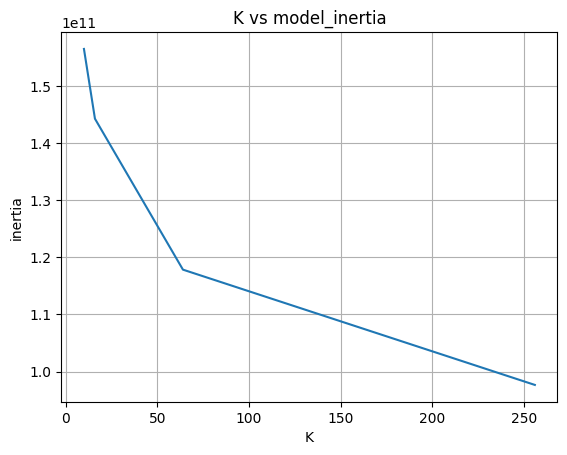

In [16]:
plt.plot(K,model_inertia)
plt.title("K vs model_inertia")
plt.xlabel("K")
plt.ylabel("inertia")
plt.grid()
plt.show()

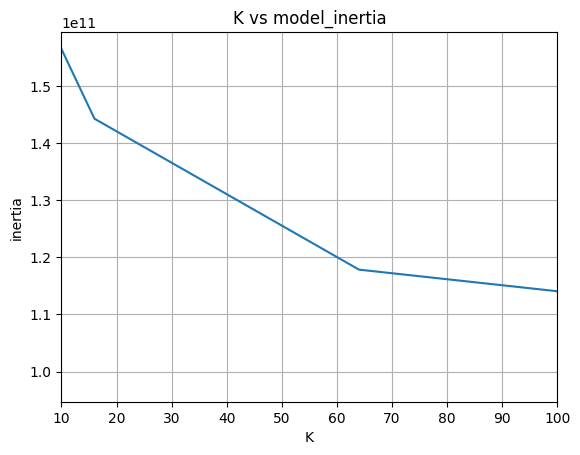

In [22]:
plt.plot(K,model_inertia)
plt.title("K vs model_inertia")
plt.xlabel("K")
plt.ylabel("inertia")
plt.xlim(10,100)
plt.grid()
plt.show()

elbow point where K=64, therefore choose that as best model

## c

In [18]:
best_k = 64
mini_batch_k_means = MiniBatchKMeans(n_clusters=best_k)
mini_batch_k_means.fit(train_images)
print(f"Inertia: {mini_batch_k_means.inertia_}")
predictions = mini_batch_k_means.predict(test_images)

Inertia: 117674149502.83302


# Additional Material

In [19]:
def assign_labels_to_clusters(clusters, true_labels, k):
    labels = np.zeros_like(clusters)
    for i in range(k):
        mask = (clusters == i)
        # Assign the most common label to the centroid
        labels[mask] = np.bincount(true_labels[mask]).argmax()
    return labels

def manual_accuracy_score(true_labels, predicted_labels):
    correct_predictions = sum(p == t for p, t in zip(predicted_labels, true_labels))
    accuracy = correct_predictions / len(true_labels)
    return accuracy


In [20]:
predicted_labels = assign_labels_to_clusters(predictions, test_labels, best_k)
accuracy = manual_accuracy_score(test_labels, predicted_labels)
print(f"Manual Accuracy: {accuracy}")
auto_accuracy = accuracy_score(test_labels, predicted_labels)
print(f"Accuracy_score function accuracy: {auto_accuracy}")

Manual Accuracy: 0.8383
Accuracy_score function accuracy: 0.8383
